<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Direction_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

14:50:15 Starting...
14:50:15 Installing yfinance into Google notebook...
14:50:28 Installing arch into Google notebook...


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


14:50:40 Initialized.


In [2]:
from requests import get
from io import StringIO
ds=pd.read_csv(StringIO("\n".join(get("https://s3.amazonaws.com/public.gillerinvestments.com/direction.csv").text.split("\n")[2:])))\
    .rename(columns={"Unnamed: 0":"Ticker"}).set_index('Ticker')
ds["Significance"]=ds["Significance"].apply(lambda x:'' if isinstance(x,float) else x)
nprint("Loaded direction statistics data.")
display(ds)

14:50:40 Loaded direction statistics data.


,Up,Down,Sample,Up:Down Ratio,Loss Percent,Loss Days,Z Score,p Value,Significance
Ticker,,,,,,,,,
Total,146,104,251,1.403846,41.434263,2.071713,2.656313,0.007900,**
UUP,71,50,232,1.420000,21.551724,1.077586,1.909091,0.056250,
TBX,36,22,187,1.636364,11.764706,0.588235,1.838290,0.066020,
QQQ,138,112,250,1.232143,44.800000,2.240000,1.644384,0.100097,
TQQQ,114,93,250,1.225806,37.200000,1.860000,1.459601,0.144400,
SH,1,4,250,0.250000,1.600000,0.080000,-1.341641,0.179712,
TBT,27,18,250,1.500000,7.200000,0.360000,1.341641,0.179712,
DIA,133,114,250,1.166667,45.600000,2.280000,1.208941,0.226685,
DOG,1,0,250,inf,0.000000,0.000000,1.000000,0.317311,


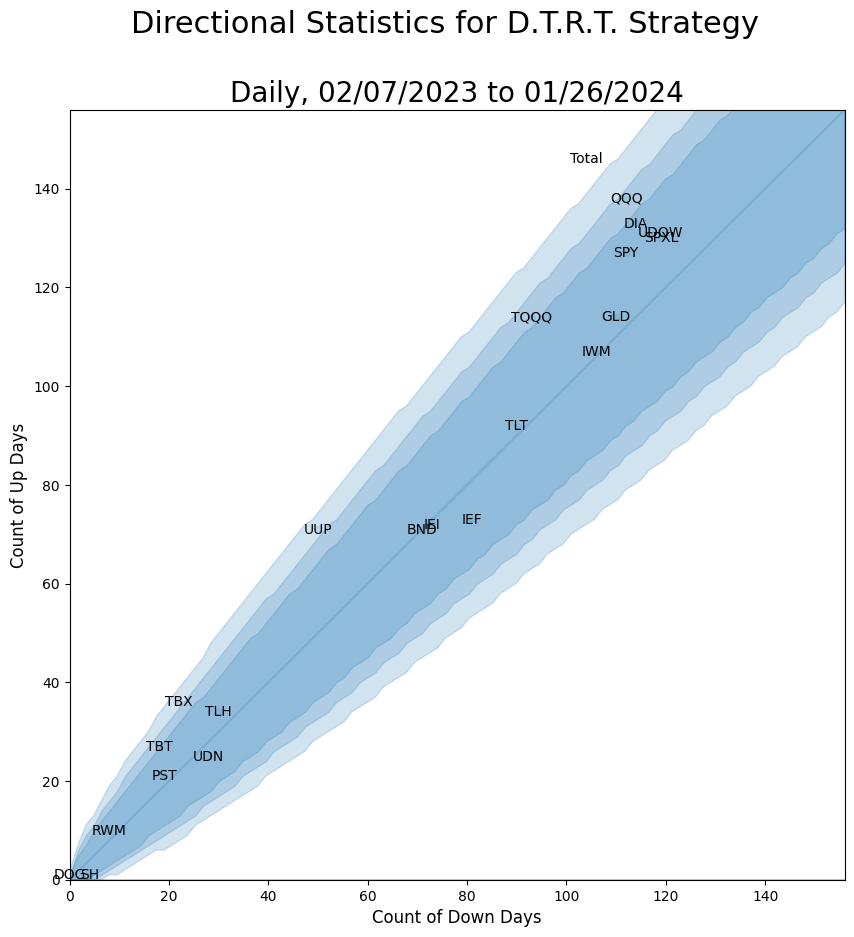

In [3]:
from scipy.stats import poisson
from datetime import timedelta

figure,plot=pl.subplots(figsize=(ten,ten))
ds.plot.scatter("Down","Up",ax=plot,alpha=0.1)

for ticker in ds.index:
    plot.text(ds.loc[ticker,"Down"],ds.loc[ticker,"Up"],ticker,ha='center',va='center',color='black')

mn,mx=ds[["Up","Down"]].min().min(),ds[["Up","Down"]].max().max()
x=np.linspace(mn+one/ten,mx+10,100)
plot.plot(x,x,'-',alpha=0.2,color='C0',label='No Directional Bias')
plot.axhline(color='black',alpha=0.2)
plot.axvline(color='black',alpha=0.2)
plot.set_xlim(zero,x[-1])
plot.set_ylim(zero,x[-1])
plot.set_xlabel("Count of %s Days" % plot.get_xlabel(),fontsize=12)
plot.set_ylabel("Count of %s Days" % plot.get_ylabel(),fontsize=12)
title="Directional Statistics for D.T.R.T. Strategy"
figure.suptitle(title,fontsize=22)
plot.set_title("Daily, %s to %s" % ((datetime.now()-timedelta(7e0/5e0*float(ds['Sample'].max()+1))).strftime(DATE_FORMAT),
    datetime.now().strftime(DATE_FORMAT)),fontsize=20)

for pvalue in 0.05,0.01,0.001:
    yp,ym=poisson.ppf(pvalue/two,x),poisson.ppf(one-pvalue/two,x)
    plot.fill_between(x,ym,yp,color='C0',alpha=0.2,label="%g %% C.R." % (hundred-pvalue*hundred))